# This is the notebook used to find the principal component data for each frequency. It is a modified version of [this notebook](https://github.com/leewujung/ooi-echo-matrix-decomposition/blob/master/notebooks/fig_si_pca.ipynb) by [Dr. Wu-Jung Lee](https://github.com/leewujung)

Note, running this notebook will create data files in the data/preprocessing_notebook directory instead of the data directory.

# Plotting PCA results

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import xarray as xr
from sklearn.decomposition import PCA

## Load data

In [6]:
MVBS_rpca_file = '20150817-20151017_MVBS_time_Sv_rangeBin5_all_corrected_rpca.nc'

In [7]:
MVBS_rpca = xr.open_dataset(os.path.join(MVBS_rpca_file))
low_rank = MVBS_rpca['low_rank']
n_observations, n_frequencies, n_depth_levels, n_pings = low_rank.shape

In [8]:
low_rank

<xarray.DataArray 'low_rank' (date: 62, frequency: 3, depth: 37, hour: 144)>
[991008 values with dtype=float64]
Coordinates:
  * date       (date) datetime64[ns] 2015-08-17 2015-08-18 ... 2015-10-17
  * frequency  (frequency) int64 38000 120000 200000
  * depth      (depth) float64 184.0 179.0 174.0 169.0 ... 14.91 9.943 4.972
  * hour       (hour) float64 0.0 0.1667 0.3333 0.5 ... 23.33 23.5 23.67 23.83

In [9]:
low_rank.values

array([[[[-62.81310474, -63.01236654, -63.05589541, ..., -60.20053489,
          -60.85029555, -60.67552525],
         [-60.59615528, -59.8954308 , -59.98109702, ..., -60.75862038,
          -60.73362924, -61.06034663],
         [-60.6282189 , -60.0276286 , -60.33801631, ..., -62.04640026,
          -62.30417687, -62.29324264],
         ...,
         [-72.15688845, -72.57027451, -70.80983184, ..., -73.24534938,
          -73.19069293, -72.59626884],
         [-72.03361952, -71.65862923, -72.53667739, ..., -73.80558327,
          -72.37376025, -72.95707146],
         [-71.80376454, -71.79081764, -70.92733798, ..., -71.53393311,
          -71.70401566, -72.04937798]],

        [[-49.59153314, -50.34532584, -50.99018432, ..., -48.13677227,
          -48.85443454, -49.20581839],
         [-50.45368749, -49.18998703, -49.22589645, ..., -50.46700185,
          -50.73494191, -50.63673728],
         [-50.13091292, -50.09173639, -50.18732504, ..., -51.81813372,
          -52.73629631, -52.98239

In [10]:
low_rank.values.shape

(62, 3, 37, 144)

In [7]:
type(low_rank)

xarray.core.dataarray.DataArray

### Separate data for each frequency using .loc and frequency labels

In [8]:
hz38 = low_rank.loc[:,38000,:,:]
hz120 = low_rank.loc[:,120000,:,:]
hz200= low_rank.loc[:,200000,:,:]

In [9]:
hz200.shape

(62, 37, 144)

In [10]:
hz200.shape == hz38.shape == hz120.shape

True

Now data for each frequency is in separate xarrays. Below is what was done in original notebook to rehape low_rank

In [11]:
low_rank = low_rank.values.reshape([n_observations,-1])

In [12]:
low_rank.shape

(62, 15984)

In [13]:
low_rank_nonneg = low_rank - low_rank.min()

In [14]:
low_rank_nonneg.shape

(62, 15984)

Lets do the same thing with our single-frequency matrices

In [15]:
hz38 = hz38.values.reshape([n_observations, -1])
hz120 = hz120.values.reshape([n_observations, -1])
hz200 = hz200.values.reshape([n_observations, -1])

In [16]:
hz38.shape

(62, 5328)

In [17]:
hz38.shape == hz120.shape == hz200.shape

True

In [18]:
hz38_nonneg = hz38 - hz38.min()
hz120_nonneg = hz120 - hz120.min()
hz200_nonneg = hz200 - hz200.min()

In [19]:
hz38_nonneg.shape

(62, 5328)

In [20]:
hz38.shape == hz120.shape == hz200.shape

True

## Run PCA on data

This is code from original notebook on full dataset

In [21]:
model_PCA = PCA(svd_solver='full')
model_PCA.fit(low_rank_nonneg)

PCA(svd_solver='full')

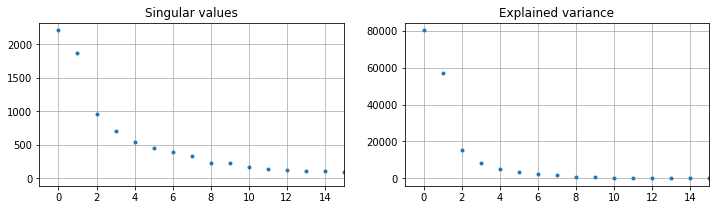

In [22]:
fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(model_PCA.singular_values_,'.')
ax[0].set_title('Singular values')
ax[0].set_xlim(-1,15)
ax[0].grid()
ax[1].plot(model_PCA.explained_variance_,'.')
ax[1].set_title('Explained variance')
ax[1].set_xlim(-1,15)
ax[1].grid()
plt.show()

Lets do the same with our single-frequency datasets

### 38 hz PCA

In [23]:
hz38_model_PCA = PCA(svd_solver='full')
hz38_model_PCA.fit(hz38_nonneg)

PCA(svd_solver='full')

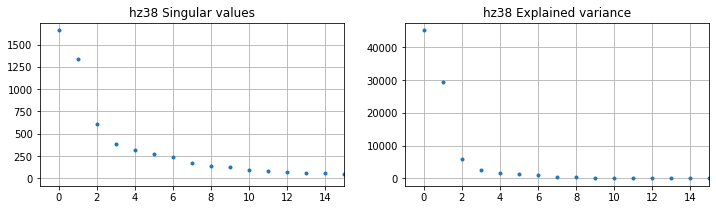

In [24]:
fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(hz38_model_PCA.singular_values_,'.')
ax[0].set_title('hz38 Singular values')
ax[0].set_xlim(-1,15)
ax[0].grid()
ax[1].plot(hz38_model_PCA.explained_variance_,'.')
ax[1].set_title('hz38 Explained variance')
ax[1].set_xlim(-1,15)
ax[1].grid()
plt.show()

### 120 hz PCA

In [25]:
hz120_model_PCA = PCA(svd_solver='full')
hz120_model_PCA.fit(hz120_nonneg)

PCA(svd_solver='full')

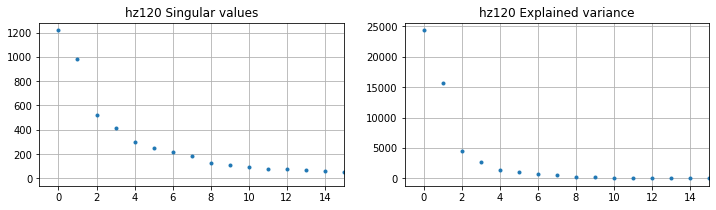

In [26]:
fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(hz120_model_PCA.singular_values_,'.')
ax[0].set_title('hz120 Singular values')
ax[0].set_xlim(-1,15)
ax[0].grid()
ax[1].plot(hz120_model_PCA.explained_variance_,'.')
ax[1].set_title('hz120 Explained variance')
ax[1].set_xlim(-1,15)
ax[1].grid()
plt.show()

### hz200 PCA

In [29]:
hz200_model_PCA = PCA(svd_solver='full')
hz200_model_PCA.fit(hz200_nonneg)

PCA(svd_solver='full')

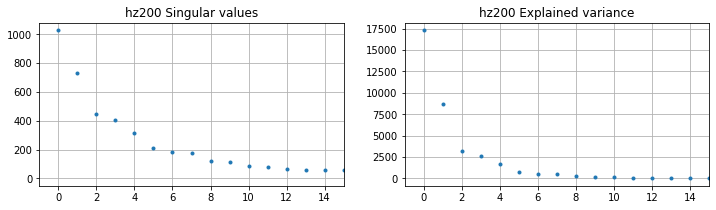

In [30]:
fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(hz200_model_PCA.singular_values_,'.')
ax[0].set_title('hz200 Singular values')
ax[0].set_xlim(-1,15)
ax[0].grid()
ax[1].plot(hz200_model_PCA.explained_variance_,'.')
ax[1].set_title('hz200 Explained variance')
ax[1].set_xlim(-1,15)
ax[1].grid()
plt.show()

### Check normalization

Original code from notebook on full dataset

In [31]:
W_PCA = model_PCA.components_
H_PCA = model_PCA.fit_transform(low_rank_nonneg)

In [32]:
(W_PCA.shape, H_PCA.shape)

((62, 15984), (62, 62))

In [33]:
# Calculate norm for W and H
weights_W = np.linalg.norm(W_PCA, axis=1)
weights_H = np.linalg.norm(H_PCA.T,axis=0)
(weights_W.shape, weights_H.shape)

((62,), (62,))

In [34]:
(weights_W, weights_H)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([278.66212749, 381.45001099, 497.3019365 , 547.58756196,
        583.58088279, 424.9269643 , 426.5113725 , 631.36305039,
        589.897248  , 507.4698314 , 445.20096398, 402.14709285,
        357.21230954, 288.38694362, 393.99613175, 350.6043334 ,
        299.33053443, 368.79597739, 452.68630105, 530.68735733,
        407.03068001, 433.03967449, 380.69532826, 280.3272372 ,
        264.65616131, 219.2006776 , 511.34378146, 639.34705165,
        326.67879261, 285.76145348, 322.15469482, 296.28474945,
        345.89804654, 435.66748916, 425.24509224, 198.60771347,
        327.93671102, 343.08053027, 334.55670099, 322.06709818,
        251.56935841, 519.44850982, 519.27258084, 429.06022353,
        233.05

We can see that all the weights are factored out to $\mathbf{H}$.

### Check normalization hz38

In [35]:
hz38_W_PCA = hz38_model_PCA.components_
hz38_H_PCA = hz38_model_PCA.fit_transform(hz38_nonneg)

In [36]:
(hz38_W_PCA.shape, hz38_H_PCA.shape)

((62, 5328), (62, 62))

In [37]:
# Calculate norm for W and H
hz38_weights_W = np.linalg.norm(hz38_W_PCA, axis=1)
hz38_weights_H = np.linalg.norm(hz38_H_PCA.T,axis=0)
(hz38_weights_W.shape, hz38_weights_H.shape)

((62,), (62,))

In [38]:
(hz38_weights_W, hz38_weights_H)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([194.11184261, 271.9664827 , 337.11772057, 380.56693911,
        400.54169529, 298.63463987, 301.64582198, 439.96174878,
        410.88564137, 360.20748626, 320.9361166 , 288.65243228,
        258.96398204, 206.15662142, 272.30493447, 252.96819645,
        178.55987491, 231.96005908, 291.83197215, 339.78438381,
        276.5258441 , 295.7061623 , 252.11043474, 205.15457257,
        192.63119909, 153.51390805, 348.08094233, 414.70058407,
        185.6205109 , 206.16535955, 226.19483475, 204.03884504,
        268.63812158, 301.8891636 , 302.48532107, 112.77073732,
        227.43476654, 224.45728075, 209.4666916 , 219.15669789,
        192.73033283, 400.20900404, 412.30939608, 327.96975211,
        154.64

We can see that all the weights are factored out to $\mathbf{H}$.

### Check normalization hz120

In [40]:
hz120_W_PCA = hz120_model_PCA.components_
hz120_H_PCA = hz120_model_PCA.fit_transform(hz120_nonneg)

In [41]:
(hz120_W_PCA.shape, hz120_H_PCA.shape)

((62, 5328), (62, 62))

In [42]:
# Calculate norm for W and H
hz120_weights_W = np.linalg.norm(hz120_W_PCA, axis=1)
hz120_weights_H = np.linalg.norm(hz120_H_PCA.T,axis=0)
(hz120_weights_W.shape, hz120_weights_H.shape)

((62,), (62,))

In [43]:
(hz120_weights_W, hz120_weights_H)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([144.76196966, 216.42703351, 285.91297898, 316.26477294,
        341.13126834, 240.73795421, 244.03322102, 366.96631941,
        341.9827829 , 275.05356382, 234.21474356, 215.99115656,
        189.73559396, 154.3771526 , 214.98825009, 189.48519003,
        172.44701069, 207.58282997, 247.39529504, 298.23502912,
        227.53622005, 239.07543514, 213.0820015 , 147.09975715,
        136.72856537, 121.38771542, 284.21676203, 360.95829047,
        181.97073693, 157.89921406, 183.00939545, 163.65277284,
        174.42030523, 243.31718094, 223.80115493, 110.22671823,
        169.62196554, 185.46731313, 187.37190786, 179.74061161,
        121.75962365, 259.5485789 , 256.87204925, 218.78297117,
        130.92

We can see that all the weights are factored out to $\mathbf{H}$.

### Check normalization for hz200

In [44]:
hz200_W_PCA = hz200_model_PCA.components_
hz200_H_PCA = hz200_model_PCA.fit_transform(hz38_nonneg)

In [45]:
(hz200_W_PCA.shape, hz200_H_PCA.shape)

((62, 5328), (62, 62))

In [46]:
# Calculate norm for W and H
hz200_weights_W = np.linalg.norm(hz200_W_PCA, axis=1)
hz200_weights_H = np.linalg.norm(hz200_H_PCA.T,axis=0)
(hz200_weights_W.shape, hz200_weights_H.shape)

((62,), (62,))

In [47]:
(hz200_weights_W, hz200_weights_H)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([194.11184261, 271.9664827 , 337.11772057, 380.56693911,
        400.54169529, 298.63463987, 301.64582198, 439.96174878,
        410.88564137, 360.20748626, 320.9361166 , 288.65243228,
        258.96398204, 206.15662142, 272.30493447, 252.96819645,
        178.55987491, 231.96005908, 291.83197215, 339.78438381,
        276.5258441 , 295.7061623 , 252.11043474, 205.15457257,
        192.63119909, 153.51390805, 348.08094233, 414.70058407,
        185.6205109 , 206.16535955, 226.19483475, 204.03884504,
        268.63812158, 301.8891636 , 302.48532107, 112.77073732,
        227.43476654, 224.45728075, 209.4666916 , 219.15669789,
        192.73033283, 400.20900404, 412.30939608, 327.96975211,
        154.64

We can see that all the weights are factored out to $\mathbf{H}$.

## Fig. S5. PCA results

Original code with all data

Reshape PCA components back to daily echogram format. This pulls out first 3 principal components

In [60]:
components_PCA = np.array([W_PCA[x,:].reshape(n_frequencies*n_depth_levels,n_pings) 
                          for x in range(3)])
components_PCA.shape

(3, 111, 144)

Assemble dataset for activation so that it is easy to plot.

In [49]:
np.array(H_PCA).shape

(62, 62)

In [50]:
# Assemble dataset for activation
ds_activation = xr.Dataset(
    {
        'H_PCA': (['component', 'day'], np.array(H_PCA).T)
    },
    coords={
        'component': np.arange(62),
        'day': MVBS_rpca['low_rank'].date.values
    }
)

ds_activation

<xarray.Dataset>
Dimensions:    (component: 62, day: 62)
Coordinates:
  * component  (component) int64 0 1 2 3 4 5 6 7 8 ... 54 55 56 57 58 59 60 61
  * day        (day) datetime64[ns] 2015-08-17 2015-08-18 ... 2015-10-17
Data variables:
    H_PCA      (component, day) float64 -196.7 66.75 ... -2.869e-13 2.994e-13

### Try on hz38

In [62]:
hz38_components_PCA = np.array([hz38_W_PCA[x,:].reshape(n_depth_levels,n_pings) 
                          for x in range(3)])
hz38_components_PCA.shape

(3, 37, 144)

I'm not doing the activation steps here because we aren't including activation in our visualization

### Original functions

Define some functions for plotting

In [63]:
def set_ax_ticks(ax):
    """Plot the tick marks for component panels
    """
    ax.set_xticks([])
    ax.set_yticks(np.arange(0,n_depth_levels*3+1,n_depth_levels))
    ax.set_yticklabels('')
    ax.grid(alpha=0.5)

In [64]:
def plot_daily_echogram_colorbar(ax1, ax2):
    pos_ax_left = ax1.get_position()
    pos_ax_right = ax2.get_position()
    cax = fig.add_axes([pos_ax_right.x0+pos_ax_right.width+0.012, 
                            pos_ax_left.y0, 
                            0.008, 
                            pos_ax_right.height])
    cbar = plt.colorbar(im, cax=cax)
#     cbar.set_ticks(np.arange(0,0.035,0.01))
    cbar.ax.tick_params(labelsize=tick_ls, pad=pad_size)
    return cbar

Change default color cycle for plotting activation sequences:

In [65]:
# Set custom color cycle
from cycler import cycler
# mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')  # default mpl color cycle
# plt.rcParams['axes.prop_cycle'] = cycler(color='cmbgryk')
# cmap = plt.cm.get_cmap('YlGnBu')
cmap = plt.cm.get_cmap('gray_r')
plt.rcParams['axes.prop_cycle'] = cycler(color=cmap([0.3,0.6,1.0]))

In [66]:
panel_ls=12
title_ls=10
freq_ls=8
comp_ls=8
axis_ls=8
legend_ls=6
tick_ls=8
pad_size=1

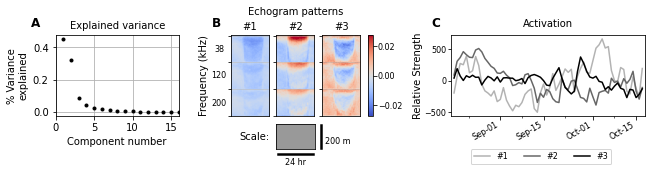

In [55]:
fig = plt.figure(figsize=(9,1.4))
gs_L = fig.add_gridspec(1,1, bottom=0.2, top=1.0, left=0.04, right=0.23, hspace=0.15)
gs_M = fig.add_gridspec(1,3, bottom=0.2, top=1.0, left=0.31,  right=0.51, hspace=0.15)
gs_R = fig.add_gridspec(1,1, bottom=0.2, top=1.0, left=0.65, right=0.95, hspace=0.15)


# PANEL: EIGENVALUES ============================================
ax_eigenvalue = fig.add_subplot(gs_L[0,0])
ax_eigenvalue.plot(np.arange(1,63), model_PCA.explained_variance_ratio_,'k.')
ax_eigenvalue.set_title('Explained variance', fontsize=title_ls)
ax_eigenvalue.set_xlim(0,16)
ax_eigenvalue.set_xlabel('Component number', fontsize=title_ls)
ax_eigenvalue.set_ylabel('% Variance\nexplained', fontsize=title_ls)
ax_eigenvalue.grid()


# PANEL: DAILY ECHOGRAM PATTERNS ================================
# vmin, vmax = (components_PCA.min(), components_PCA.max()*0.95)
vmax = np.abs([components_PCA.min(), components_PCA.max()]).max()*0.85
ax_echogram = []
for seq in range(3):  # loop through 3 components
    ax_echogram.append(fig.add_subplot(gs_M[0,seq]))
    im = ax_echogram[-1].imshow(components_PCA[seq,:,:], aspect='auto', 
                            vmin=-vmax, vmax=vmax, cmap='coolwarm')
    set_ax_ticks(ax_echogram[-1])
plot_daily_echogram_colorbar(ax_echogram[0], ax_echogram[2])

# Add frequency for echogram patterns
[
    fig.text(
        x=-0.3, y=yy, s=ss, transform=ax_echogram[0].transAxes,
        fontsize=freq_ls,
        ha='center', va='center')
    for ss,yy in zip(['200', '120', '38'], [0.15, 0.5, 0.825])
]

# Add echogram pattern labels
[ax_echogram[x-1].set_title('#%d' % x, fontsize=title_ls, pad=5) for x in np.arange(1,4,1)]


# PANEL: ACTIVATION COEFFICIENTS ================================
axa = fig.add_subplot(gs_R[0,0])
h1 = ds_activation.H_PCA.isel(component=slice(0,3)).\
        plot.line(x='day', ax=axa,
                  add_legend=False, _labels=False)
axa.xaxis.set_major_locator(
    mdates.MonthLocator(bymonth=range(8,11), bymonthday=[1,15]))
axa.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
axa.xaxis.set_minor_locator(mdates.AutoDateLocator())
axa.set_xlim([datetime.date(2015,8,16), datetime.date(2015,10,18)])
axa.set_title('')
# axa.set_xticklabels('')
axa.tick_params(labelsize=tick_ls, pad=pad_size)

# Add component legend
axa.legend(['#1', '#2', '#3'], 
              fontsize=tick_ls,
              bbox_to_anchor=(0.08, -0.65), 
              loc='lower left', ncol=3)


# Add panel labels
fig.text(x=-0.2,y=1.1,s='A',
         transform=ax_eigenvalue.transAxes,
         fontsize=panel_ls, fontweight='bold')
fig.text(x=-0.5,y=1.1,s='B',
         transform=ax_echogram[0].transAxes,
         fontsize=panel_ls, fontweight='bold')
fig.text(x=-0.1,y=1.1,s='C',
         transform=axa.transAxes,
         fontsize=panel_ls, fontweight='bold')

fig.text(x=-0.7, y=0.5, s='Frequency (kHz)', 
         transform=ax_echogram[0].transAxes,
         fontsize=title_ls, 
         rotation=90, ha='center', va='center')
fig.text(x=0.5,y=1.25,s='Echogram patterns',
         transform=ax_echogram[1].transAxes,
         fontsize=title_ls, ha='center')
fig.text(x=0.5,y=1.1,s='Activation',
         transform=axa.transAxes,
         fontsize=title_ls, ha='center')
fig.text(x=-0.17, y=0.5, s='Relative Strength', 
         transform=axa.transAxes,
         fontsize=title_ls, 
         rotation=90, ha='center', va='center')


# Add example axis for daily echogram patterns
gs_ex = fig.add_gridspec(1,1, bottom=-0.13, top=0.12, left=0.28+0.1, right=0.34+0.1)
ax_ex = fig.add_subplot(gs_ex[0,0])
ax_ex.set_xticks([])
ax_ex.set_yticks([])
ax_ex.set_facecolor(np.ones(3)*0.6)

trans = ax_ex.get_xaxis_transform()
ax_ex.plot([0,1],[-0.2,-0.2],  # add a line for horizontal scale
            color='k', lw=2.5, 
            transform=trans, clip_on=False)
ax_ex.annotate('24 hr',             # annotate
                xy=(0.2,-0.7), xycoords=trans, 
                ha='left', va='bottom', 
                fontsize=axis_ls)
trans = ax_ex.get_yaxis_transform()
ax_ex.plot([1.15,1.15],[0.2,1],  # add a line for vertical scale
            color='k', lw=2.5, 
            transform=trans, clip_on=False)
ax_ex.annotate('200 m',            # annotate
                xy=(1.6,0.6), xycoords=trans, 
                ha='center', va='top', rotation=0,
                fontsize=axis_ls)
fig.text(x=-0.55, y=0.5, s='Scale:', 
         transform=ax_ex.transAxes,
         fontsize=title_ls, 
         rotation=0, ha='center', va='center')

plt.show()

fig.savefig(os.path.join('../figs/fig_si_pca.png'),
            dpi=300, bbox_inches = 'tight', pad_inches = 0.05)

### messily trying to make echogram and explained variance of just hz38

[Text(0.5, 1.0, '#1'), Text(0.5, 1.0, '#2'), Text(0.5, 1.0, '#3')]

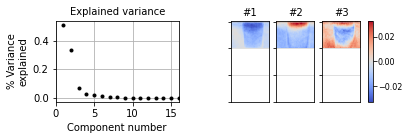

In [70]:
fig = plt.figure(figsize=(9,1.4))
gs_L = fig.add_gridspec(1,1, bottom=0.2, top=1.0, left=0.04, right=0.23, hspace=0.15)
gs_M = fig.add_gridspec(1,3, bottom=0.2, top=1.0, left=0.31,  right=0.51, hspace=0.15)
gs_R = fig.add_gridspec(1,1, bottom=0.2, top=1.0, left=0.65, right=0.95, hspace=0.15)

# PANEL: EIGENVALUES ============================================
ax_eigenvalue = fig.add_subplot(gs_L[0,0])
ax_eigenvalue.plot(np.arange(1,63), hz38_model_PCA.explained_variance_ratio_,'k.')
ax_eigenvalue.set_title('Explained variance', fontsize=title_ls)
ax_eigenvalue.set_xlim(0,16)
ax_eigenvalue.set_xlabel('Component number', fontsize=title_ls)
ax_eigenvalue.set_ylabel('% Variance\nexplained', fontsize=title_ls)
ax_eigenvalue.grid()

# PANEL: DAILY ECHOGRAM PATTERNS ================================
# vmin, vmax = (components_PCA.min(), components_PCA.max()*0.95)
vmax = np.abs([hz38_components_PCA.min(), hz38_components_PCA.max()]).max()*0.85
ax_echogram = []
for seq in range(3):  # loop through 3 components
    ax_echogram.append(fig.add_subplot(gs_M[0,seq]))
    im = ax_echogram[-1].imshow(hz38_components_PCA[seq,:,:], aspect='auto', 
                            vmin=-vmax, vmax=vmax, cmap='coolwarm')
    set_ax_ticks(ax_echogram[-1])
plot_daily_echogram_colorbar(ax_echogram[0], ax_echogram[2])

# Add echogram pattern labels
[ax_echogram[x-1].set_title('#%d' % x, fontsize=title_ls, pad=5) for x in np.arange(1,4,1)]


# Export Variance Data

### 38hz

In [83]:
hz38_model_PCA.explained_variance_ratio_

array([5.09196763e-01, 3.32627614e-01, 6.76963130e-02, 2.75588928e-02,
       1.90911538e-02, 1.39873502e-02, 1.05086935e-02, 5.68591047e-03,
       3.34531520e-03, 2.91456259e-03, 1.63018399e-03, 1.10876147e-03,
       9.14035728e-04, 6.98784164e-04, 5.98554320e-04, 4.92922928e-04,
       4.88399951e-04, 4.10805877e-04, 2.45396345e-04, 2.00007987e-04,
       1.56663011e-04, 1.23697926e-04, 9.75974982e-05, 6.92890494e-05,
       4.56862663e-05, 3.29637514e-05, 2.88334443e-05, 1.97641235e-05,
       1.69237698e-05, 5.04811400e-06, 2.95910032e-06, 1.51733048e-07,
       1.90006382e-30, 1.00237140e-30, 6.75678838e-31, 6.46661730e-31,
       6.10485263e-31, 5.81625395e-31, 5.67463320e-31, 5.36480528e-31,
       5.25505567e-31, 5.22654635e-31, 5.16351816e-31, 5.16172655e-31,
       5.16018623e-31, 5.15410008e-31, 5.13904253e-31, 5.12111767e-31,
       5.10028311e-31, 5.08288412e-31, 5.08169722e-31, 5.07799072e-31,
       5.05923048e-31, 5.04714320e-31, 5.03434062e-31, 4.98313513e-31,
      

In [84]:
hz38_variance_data_df = pd.DataFrame(hz38_model_PCA.explained_variance_ratio_,
                                    index=np.arange(1,63),
                                    columns=['variance'])

In [85]:
hz38_variance_data_df.index.name = 'num'
hz38_variance_data_df

,variance
num,
1,5.091968e-01
2,3.326276e-01
3,6.769631e-02
4,2.755889e-02
5,1.909115e-02
...,...
58,4.745120e-31
59,4.621112e-31
60,4.450318e-31


In [86]:
hz38_variance_data_df.to_csv('hz38_explained_variance_data.csv')

### 180 hz

In [87]:
hz120_model_PCA.explained_variance_ratio_

array([4.65922935e-01, 2.99676609e-01, 8.47043541e-02, 5.30213551e-02,
       2.77426453e-02, 2.01937996e-02, 1.52201936e-02, 1.09152118e-02,
       5.24384012e-03, 4.03771195e-03, 2.75209640e-03, 1.98495634e-03,
       1.68527592e-03, 1.31904779e-03, 1.25205750e-03, 9.32968643e-04,
       8.29089344e-04, 6.66685888e-04, 4.41477044e-04, 3.26623990e-04,
       2.91202865e-04, 2.36839093e-04, 1.91920379e-04, 1.20537552e-04,
       8.70319983e-05, 6.64749707e-05, 5.12153663e-05, 3.83242782e-05,
       3.12854021e-05, 9.99535415e-06, 5.93860095e-06, 2.99644855e-07,
       1.44141792e-30, 1.03219361e-30, 8.69900826e-31, 8.32739146e-31,
       8.03954737e-31, 7.83750382e-31, 7.76683321e-31, 7.65602604e-31,
       7.34820078e-31, 7.29233444e-31, 7.20900332e-31, 7.14347758e-31,
       7.13961920e-31, 7.11974035e-31, 6.91935771e-31, 6.85993599e-31,
       6.78423179e-31, 6.71432323e-31, 6.55951511e-31, 6.52759035e-31,
       6.42719440e-31, 6.37714505e-31, 6.28028061e-31, 6.19838703e-31,
      

In [88]:
hz120_variance_data_df = pd.DataFrame(hz120_model_PCA.explained_variance_ratio_,
                                    index=np.arange(1,63),
                                    columns=['variance'])

In [89]:
hz120_variance_data_df.index.name = 'num'
hz120_variance_data_df

,variance
num,
1,4.659229e-01
2,2.996766e-01
3,8.470435e-02
4,5.302136e-02
5,2.774265e-02
...,...
58,5.970060e-31
59,5.836125e-31
60,5.432947e-31


In [90]:
hz120_variance_data_df.to_csv('hz120_explained_variance_data.csv')

### 200 hz

In [92]:
hz200_model_PCA.explained_variance_ratio_

array([5.09196763e-01, 3.32627614e-01, 6.76963130e-02, 2.75588928e-02,
       1.90911538e-02, 1.39873502e-02, 1.05086935e-02, 5.68591047e-03,
       3.34531520e-03, 2.91456259e-03, 1.63018399e-03, 1.10876147e-03,
       9.14035728e-04, 6.98784164e-04, 5.98554320e-04, 4.92922928e-04,
       4.88399951e-04, 4.10805877e-04, 2.45396345e-04, 2.00007987e-04,
       1.56663011e-04, 1.23697926e-04, 9.75974982e-05, 6.92890494e-05,
       4.56862663e-05, 3.29637514e-05, 2.88334443e-05, 1.97641235e-05,
       1.69237698e-05, 5.04811400e-06, 2.95910032e-06, 1.51733048e-07,
       1.90006382e-30, 1.00237140e-30, 6.75678838e-31, 6.46661730e-31,
       6.10485263e-31, 5.81625395e-31, 5.67463320e-31, 5.36480528e-31,
       5.25505567e-31, 5.22654635e-31, 5.16351816e-31, 5.16172655e-31,
       5.16018623e-31, 5.15410008e-31, 5.13904253e-31, 5.12111767e-31,
       5.10028311e-31, 5.08288412e-31, 5.08169722e-31, 5.07799072e-31,
       5.05923048e-31, 5.04714320e-31, 5.03434062e-31, 4.98313513e-31,
      

In [93]:
hz200_variance_data_df = pd.DataFrame(hz200_model_PCA.explained_variance_ratio_,
                                    index=np.arange(1,63),
                                    columns=['variance'])

In [94]:
hz200_variance_data_df.index.name = 'num'
hz200_variance_data_df

,variance
num,
1,5.091968e-01
2,3.326276e-01
3,6.769631e-02
4,2.755889e-02
5,1.909115e-02
...,...
58,4.745120e-31
59,4.621112e-31
60,4.450318e-31


In [95]:
hz200_variance_data_df.to_csv('hz200_explained_variance_data.csv')

# Export WPCA data

In [96]:
np.savetxt("hz38_W_PCA_data.csv", hz38_W_PCA, delimiter=",")
np.savetxt("hz120_W_PCA_data.csv", hz120_W_PCA, delimiter=",")
np.savetxt("hz200_W_PCA_data.csv", hz200_W_PCA, delimiter=",")